In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [2]:
df=pd.read_csv('vgsales.csv')
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
#Categorical data, cannot find mean or median, and replacing unknown values with mode might give very inaccurate values
#hence, we are replacing the Unknown Publishers with NaN.
for index,row in df.Publisher.iteritems():
    if(row=="N/A" or row=="Unknown"):
        row=np.nan

In [4]:
df.isnull().values.any()

True

In [5]:
#Dropping all NaN values (there are no unknown numeric values. All NaN values come from the categorical data.)
df=df.dropna()
df.isnull().values.any()

False

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
#Genre vs Region                                            
#Platform vs Region
#Platform vs Genre
#Platform vs Genre - grouped bar chart, w/ Global sales  
#Genre vs Year
#Global sales vs Year
#Individual regions Sales vs Year
#Global Sales for each Publisher vs Year - use this to predict sales in future for each company, calculate growth rate(??), compare
#Sales in each for each Publisher vs Year - use this to predict sales in each in future for each company, calculate growth rate(??), compare
#Publisher vs Genre
#Platform vs Year

In [8]:
#number of unique Platforms
l=df.Platform.unique()
print(type(l))
len(l)

<class 'numpy.ndarray'>


31

In [9]:
#Number of Unique Genres
list=df.Genre.unique()
len(list)

12

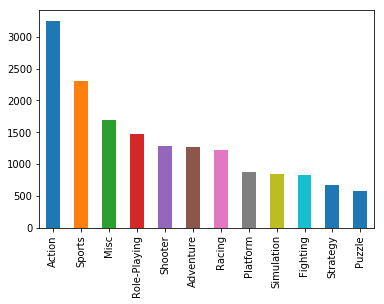

In [10]:
#Frequency plot for Genre - to find the most popular Genre
df['Genre'].value_counts().plot(kind='bar')

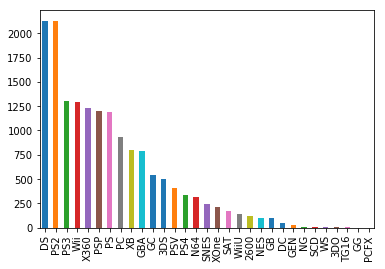

In [11]:
#Frequency plot for Genre - to find the most popular Genre
df['Platform'].value_counts().plot(kind='bar')

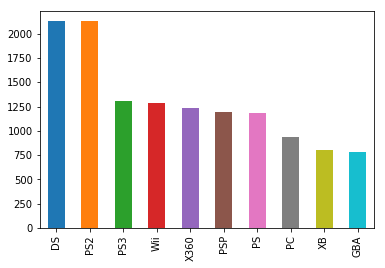

In [12]:
df['Platform'].value_counts(sort=True)[:10].plot(kind='bar')

In [13]:
multi_plat = df.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 7) else None}).dropna()
multi_plat.Name = multi_plat.Name.astype(np.int64)
multi_plat = multi_plat.sort_values(['Name'], ascending=False)
multi_plat.columns = ['Platform_count']
multi_plat

C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Platform_count
Name,
Need for Speed: Most Wanted,12
FIFA 14,9
Ratatouille,9
LEGO Marvel Super Heroes,9
Angry Birds Star Wars,8
Madden NFL 07,8
Terraria,8
Monopoly,8
Madden NFL 08,8


Text(0,0.5,'Sales')

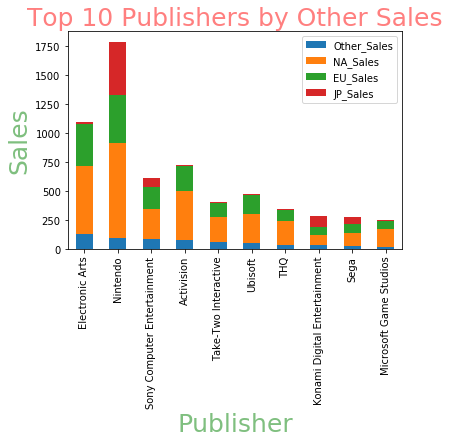

In [14]:
global_pub = df.pivot_table(index=['Publisher'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_pub = global_pub[['Other_Sales','NA_Sales','EU_Sales','JP_Sales']]
ax = global_pub.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Other Sales', size=25, color='red', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

Text(0,0.5,'Sales')

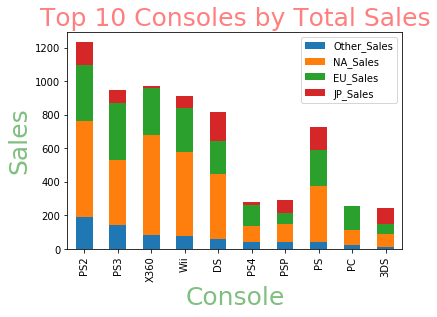

In [15]:
global_pub = df.pivot_table(index=['Platform'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_pub = global_pub[['Other_Sales','NA_Sales','EU_Sales','JP_Sales']]
ax = global_pub.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Consoles by Total Sales', size=25, color='red', alpha=0.5)
ax.set_xlabel('Console', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

Text(0,0.5,'Number of sales')

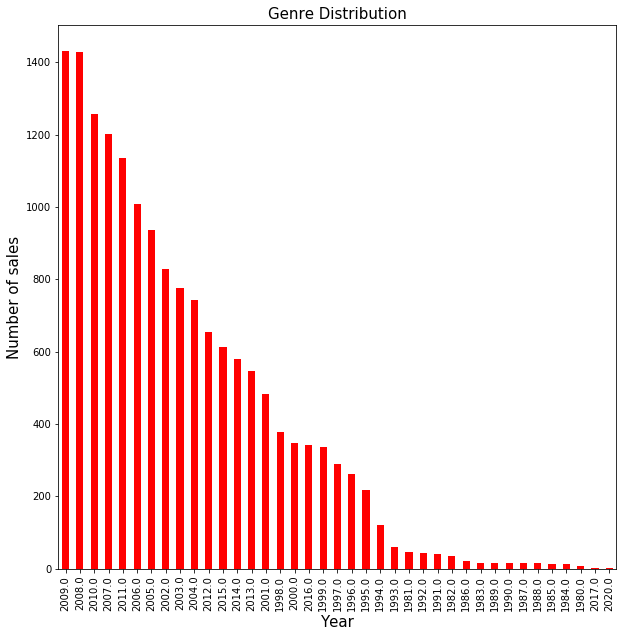

In [16]:
row,col = plt.subplots(figsize=(10,10))
df['Year'].value_counts(sort=True).plot(kind='bar',color = 'red')
plt.title('Genre Distribution',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of sales',fontsize=15)

In [19]:
print('hello')

hello


In [22]:
multi_plat = df.groupby('Year').agg({'Year':lambda x : len(x) if (len(x) > 7) else None}).dropna()
multi_plat.Year = multi_plat.Year.astype(np.int64)
multi_plat = multi_plat.sort_values(['Year'], ascending=False)
multi_plat.columns = ['Genre']
multi_plat

C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Genre
Year,
2009.0,1431
2008.0,1428
2010.0,1257
2007.0,1201
2011.0,1136
2006.0,1008
2005.0,936
2002.0,829
2003.0,775


C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'Year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Genre')

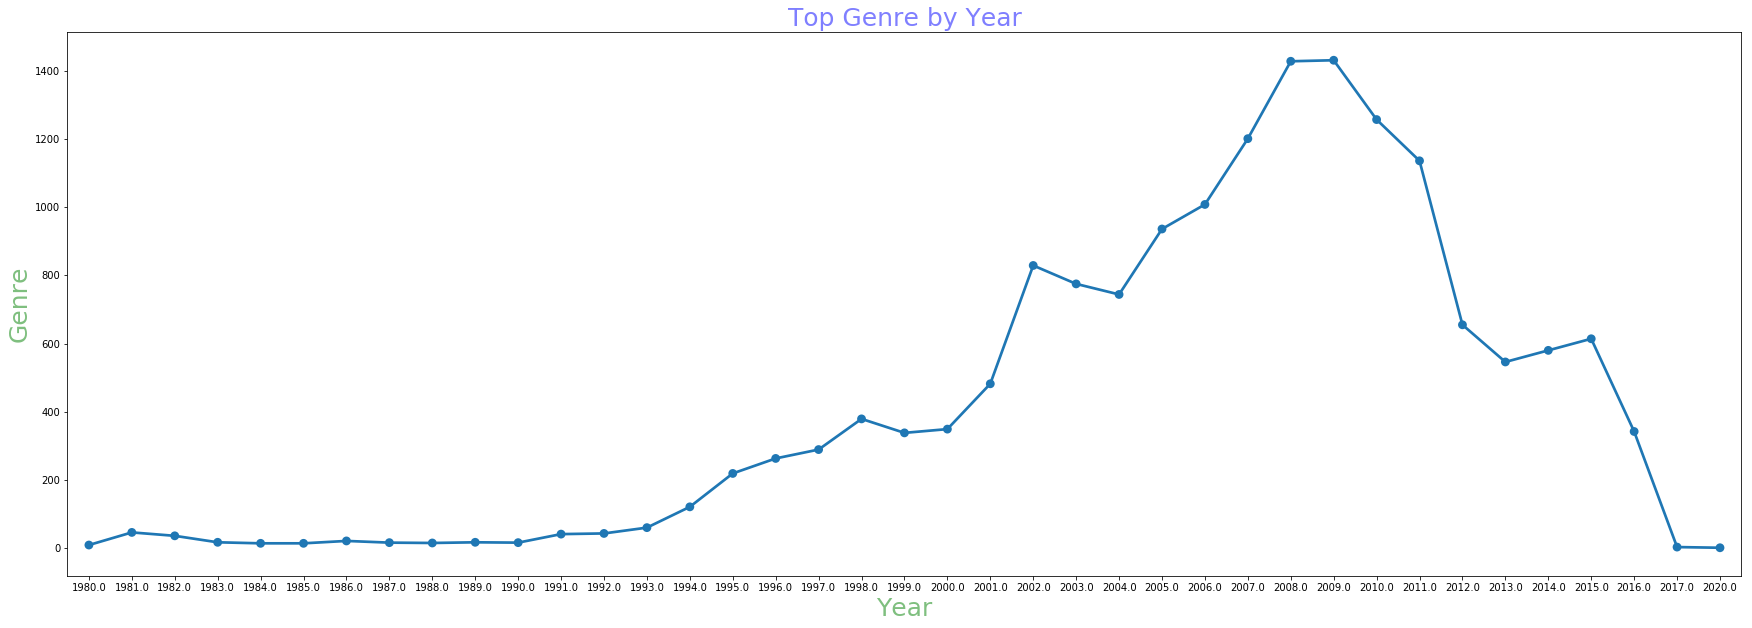

In [31]:
genre_by_year = df.groupby('Year').agg({'Year':len}).sort_values('Year')
plt.subplots(figsize=(30,10))
ax = sb.pointplot(x=genre_by_year.index, y=genre_by_year.Year)
ax.set_title('Top Genre by Year', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Year', color='green', size=25, alpha=0.5)
ax.set_ylabel('Genre', color='green', size=25, alpha=0.5)

Text(0,0.5,'Year')

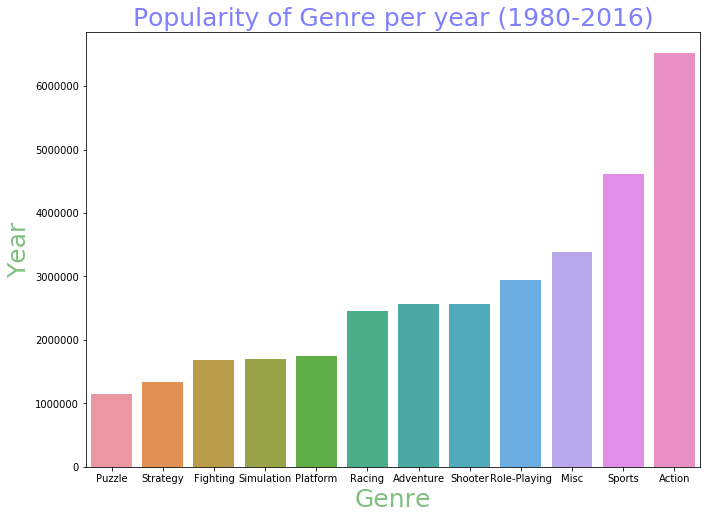

In [34]:
global_sales_by_genre = df.groupby('Genre').agg({'Year':np.sum}).sort_values('Year')
plt.subplots(figsize=(11,8))
ax = sb.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Year)
ax.set_title('Popularity of Genre per year (1980-2016)', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='green', size=25, alpha=0.5)
ax.set_ylabel('Year', color='green', size=25, alpha=0.5)

Text(0,0.5,'Sales')

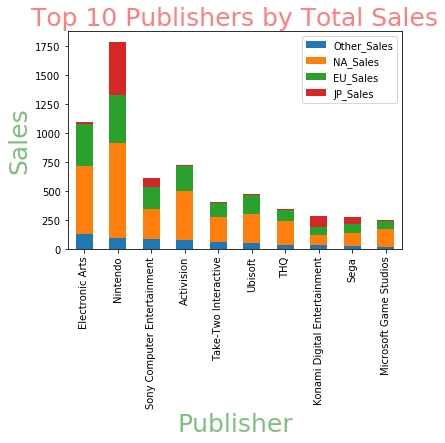

In [36]:
global_pub = df.pivot_table(index=['Publisher'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_pub = global_pub[['Other_Sales','NA_Sales','EU_Sales','JP_Sales']]
ax = global_pub.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Total Sales', size=25, color='red', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

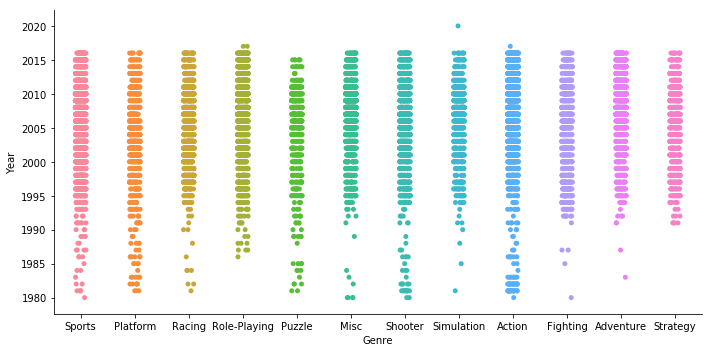

In [37]:
sb.catplot(x="Genre", y="Year", data=df, height=5, aspect=2)


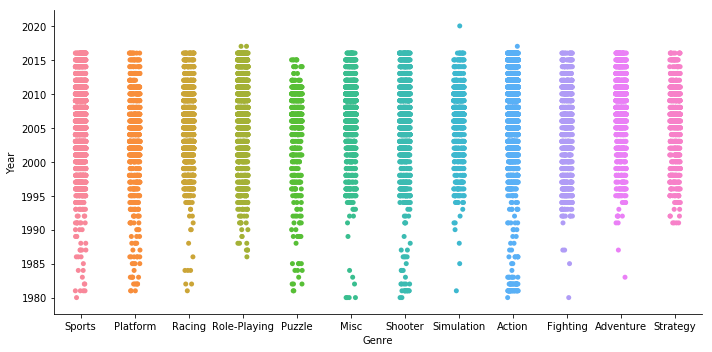

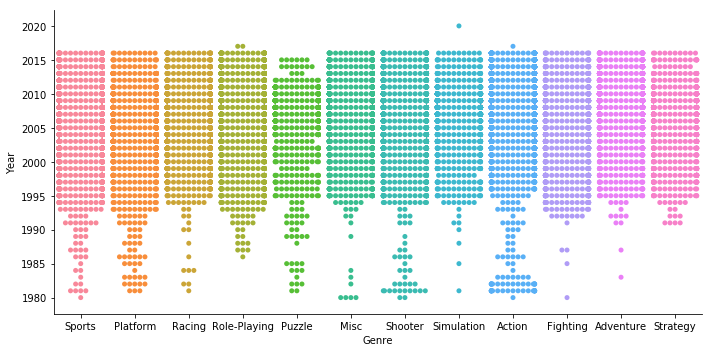

In [38]:
sb.catplot(x="Genre", y="Year", data=df, height=5, aspect=2)
sb.catplot(x="Genre", y="Year", kind="swarm", data=df, height=5, aspect=2)

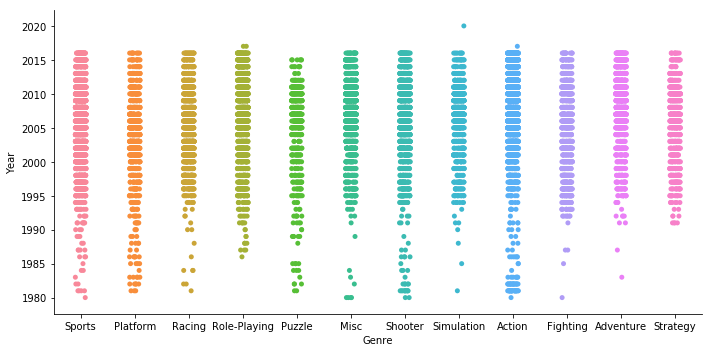

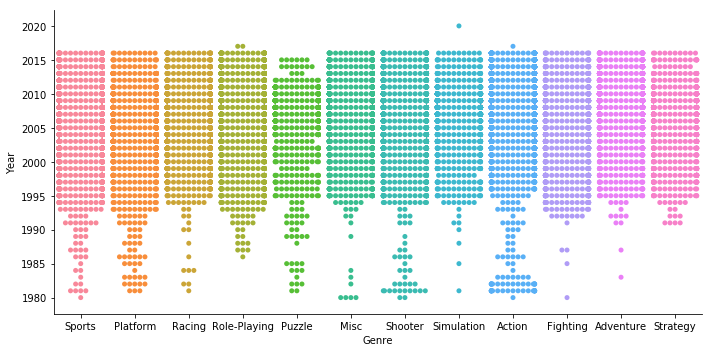

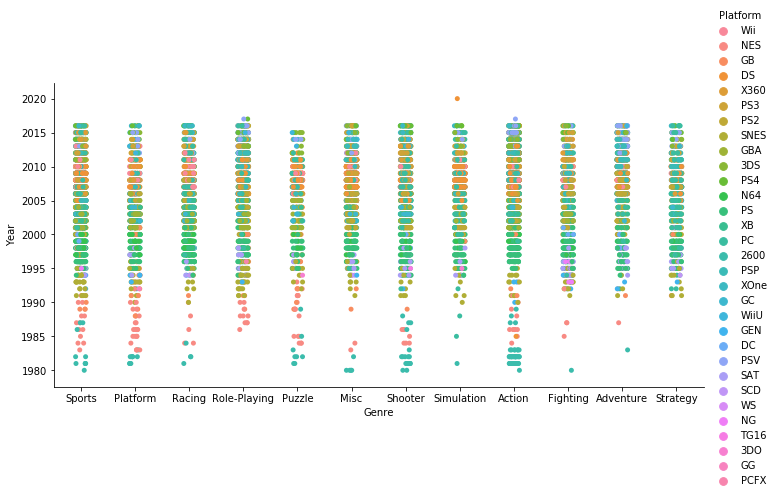

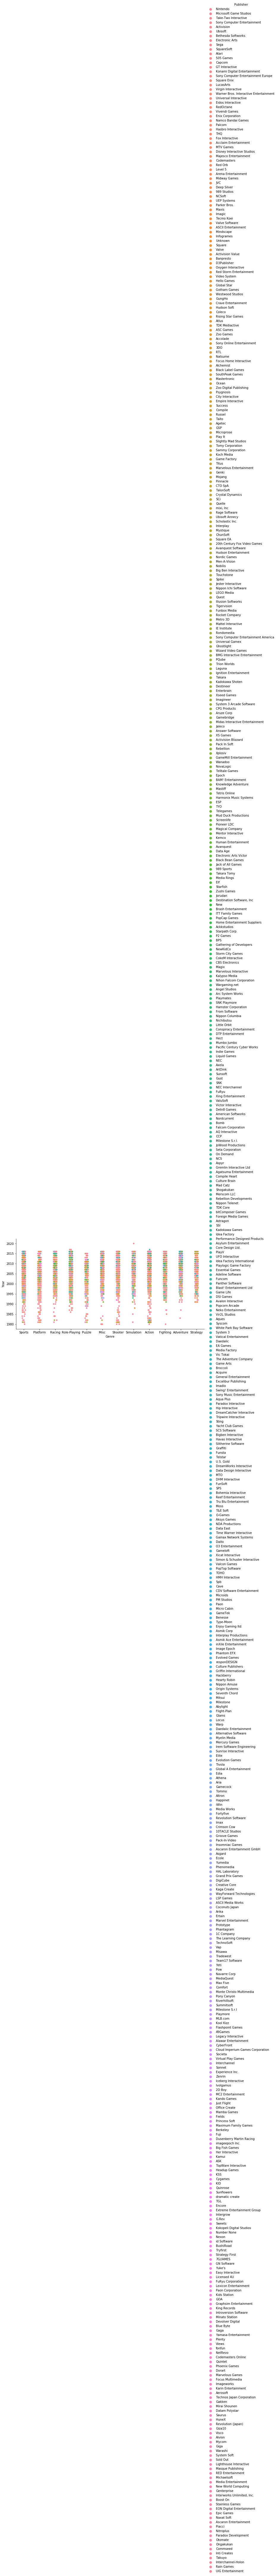

In [39]:
sb.catplot(x="Genre", y="Year", data=df, height=5, aspect=2)
sb.catplot(x="Genre", y="Year", kind="swarm", data=df, height=5, aspect=2)
sb.catplot(x="Genre", y="Year", hue="Platform", data=df, height=5, aspect=2)
sb.catplot(x="Genre", y="Year", hue="Publisher", data=df, height=5, aspect=2)


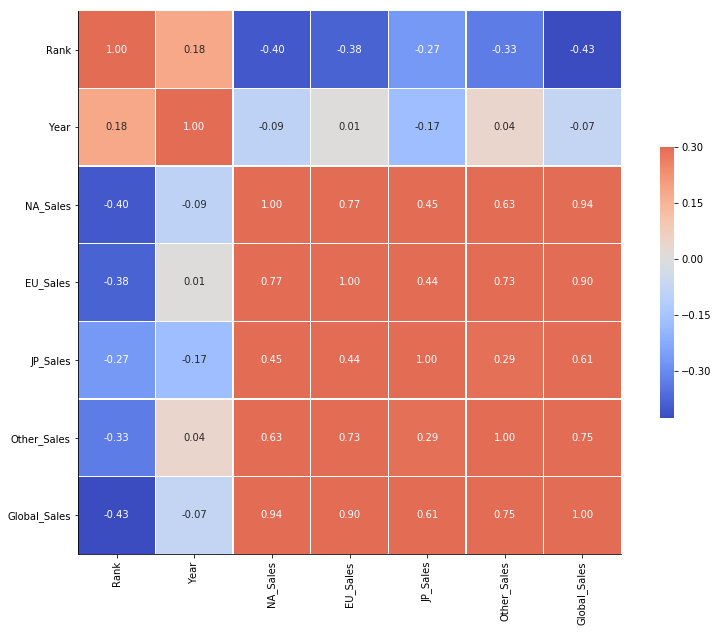

In [40]:
corr = df.corr()
g = sb.heatmap(corr,  vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sb.despine()
g.figure.set_size_inches(14,10)
   
plt.show()

C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


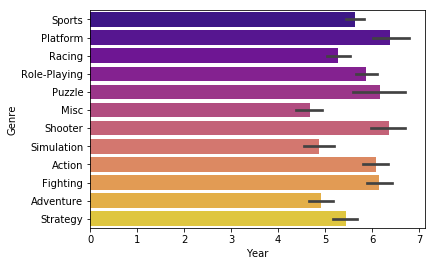

In [41]:
sb.barplot(x ='Year', y ='Genre', data = df,  
           palette ='plasma', estimator = np.std) 

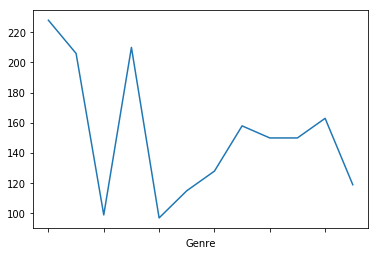

In [42]:
types = df.groupby('Genre')['Publisher'].nunique().plot()

C:\Users\Avinash Ratnam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


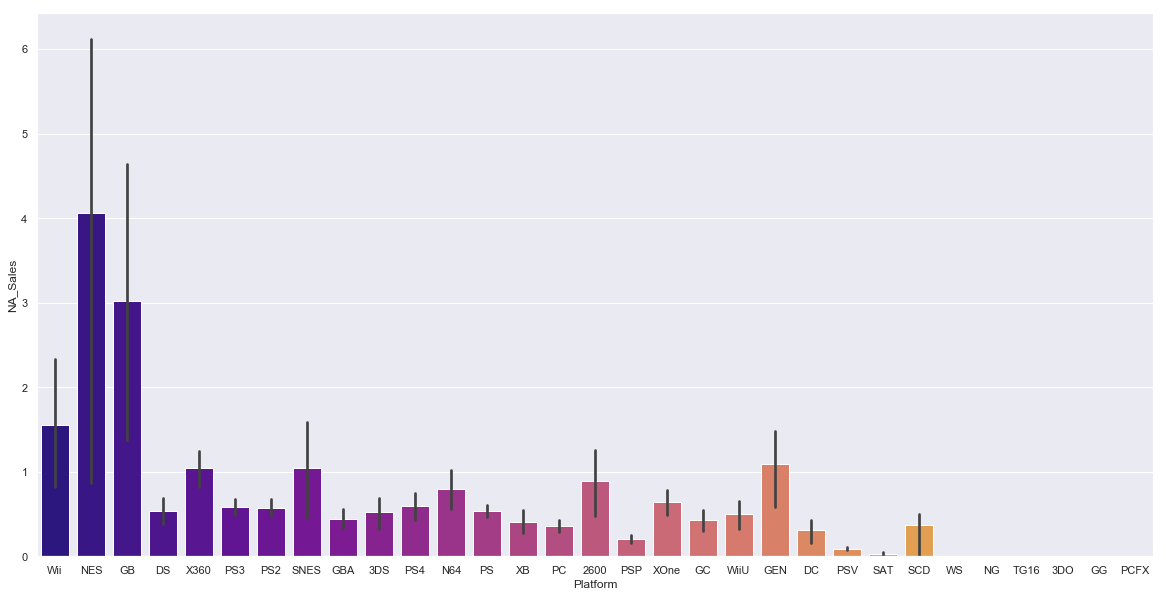

In [47]:
#platform v NA Sales
sb.set(rc={'figure.figsize':(20,10)})
sb.barplot(x ='Platform', y ='NA_Sales', data = df,  
           palette ='plasma', estimator = np.std)
